In [1]:
import numpy as np

# Import classes
from idtxl.bivariate_mi import BivariateMI
from idtxl.data import Data
from idtxl.visualise_graph import plot_network
import matplotlib.pyplot as plt

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Adding data with properties: 2 processes, 1000 samples, 1 replications
overwriting existing data

---------------------------- (1) include source candidates


---------------------------- (2) prune cadidates
selected vars sources [(1, 0)]
selected candidates current source: [(1, 0)]

---------------------------- (3) final statistics

---------------------------- (1) include source candidates


---------------------------- (2) prune cadidates
selected vars sources [(0, 0)]
selected candidates current source: [(0, 0)]

---------------------------- (3) final statistics
For var 0 sources [1] mi [0.83757767] p [0.002]
For var 1 sources [0] mi [0.83757767] p [0.002]
No significant links found in the network.


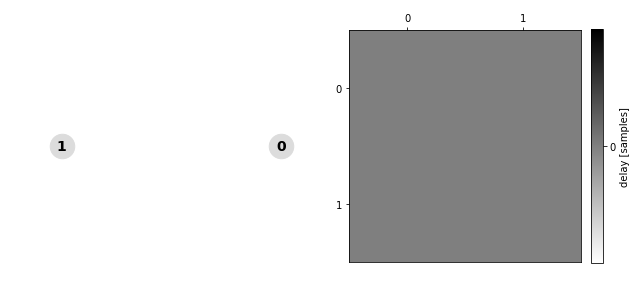

In [7]:
def cycle(data, n):
    if n == 0:
        return data
    else:
        return np.hstack((data[n:], data[:n]))

# TEST 1: Random data
NDATA = 1000

dataNP = np.zeros((2, NDATA))
dataNP[0,:] = np.random.normal(0, 1, NDATA)
dataNP[1,:] = cycle(2*np.copy(dataNP[0,:]) + np.random.normal(0, 1, NDATA), 0)
data = Data(dataNP, dim_order='ps')

# b) Initialise analysis object and define settings
network_analysis = BivariateMI()
settings = {'cmi_estimator': 'JidtGaussianCMI',
            'max_lag_sources': 0,
            'min_lag_sources': 0,
           'verbose' : False}

# c) Run analysis
results = network_analysis.analyse_network(settings=settings, data=data)
for i in range(2):
    rezThis = results.get_single_target(i, fdr=False)
    print("For var", i, "sources", rezThis['sources_tested'], 'mi', rezThis['mi'], 'p', rezThis['selected_sources_pval'])

# print(results.get_single_target(0, fdr=False))
# print(results.settings)
# print(results.data_properties)

# d) Plot inferred network to console and via matplotlib
results.print_edge_list(weights='max_te_lag', fdr=False)
plot_network(results=results, weights='max_te_lag', fdr=False)
plt.show()

{'sources_tested': [1], 'current_value': (0, 5), 'selected_vars_sources': [(1, 1)], 'selected_vars_target': [], 'selected_sources_pval': array([0.002]), 'selected_sources_mi': array([0.83001421]), 'omnibus_mi': 0.8300142064797621, 'omnibus_pval': 0.002, 'omnibus_sign': True, 'mi': array([0.83001421])}
{'cmi_estimator': 'JidtGaussianCMI', 'max_lag_sources': 5, 'min_lag_sources': 0, 'verbose': False, 'fdr_correction': True, 'add_conditionals': None, 'tau_sources': 1, 'local_values': False, 'debug': False, 'n_perm_max_stat': 200, 'alpha_max_stat': 0.05, 'permute_in_time': True, 'perm_type': 'random', 'analytical_surrogates': True, 'n_perm_omnibus': 500, 'alpha_omnibus': 0.05, 'n_perm_max_seq': 500, 'alpha_max_seq': 0.05, 'alpha_fdr': 0.05, 'fdr_correct_by_target': True, 'fdr_constant': 2}
{'n_nodes': 2, 'n_realisations': 995, 'normalised': True}


In [6]:
covariance = 0.4
n = 1000
source = np.random.randn(n)
target = (1 - covariance) * np.random.randn(n) + covariance * source

data = Data(np.vstack((source, target)),
            dim_order='ps', normalise=False)
settings = {
    'cmi_estimator': 'JidtKraskovCMI',
    'n_perm_max_stat': 21,
    'n_perm_min_stat': 21,
    'n_perm_max_seq': 21,
    'n_perm_omnibus': 21,
    'max_lag_sources': 0,
    'min_lag_sources': 0}
nw = BivariateMI()
results = nw.analyse_single_target(
    settings, data, target=1, sources='all')

print(results.get_single_target(1, fdr=False))
# the following should return [(0, 0)]
print(results.get_single_target(1, fdr=False).selected_vars_sources)

results.print_edge_list(weights='max_te_lag', fdr=False)

Adding data with properties: 2 processes, 1000 samples, 1 replications
overwriting existing data

Target: 1 - testing sources [0]

---------------------------- (1) include source candidates
candidate set current source: [(0, 0)]
testing candidate: (0, 0) 
maximum statistic, n_perm: 21

---------------------------- (2) prune cadidates
selected vars sources [(0, 0)]
selected candidates current source: [(0, 0)]
 -- significant

---------------------------- (3) final statistics
selected variables: [(0, 0)]
omnibus test, n_perm: 21
 -- significant

sequential maximum statistic, n_perm: 21
final source samples: [(0, 0)]
final target samples: []


{'sources_tested': [0], 'current_value': (1, 0), 'selected_vars_sources': [(0, 0)], 'selected_vars_target': [], 'selected_sources_pval': array([0.04761905]), 'selected_sources_mi': array([0.15109115]), 'omnibus_mi': 0.15109114567054327, 'omnibus_pval': 0.047619047619047616, 'omnibus_sign': True, 'mi': array([0.15109115])}
[(0, 0)]
No significant lin